# Partial Derivativs and Symbolic Computation

## Minimise 
$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$ 
## or
$f(x, y) = \frac{1}{r + 1}$ where $r$ is $3^{-x^2 - y^2}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

%matplotlib inline

In [2]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [3]:
# Make x and y data
x = np.linspace(start=-2, stop=2, num=200)
y = np.linspace(start=-2, stop=2, num=200)

#np.linspace returns 1d array (vector)
print('Shape of X array', x.shape)

#Converting 1d array to 2d array
x, y = np.meshgrid(x, y)
print('Shape of X array after convertion:', x.shape)

Shape of X array (200,)
Shape of X array after convertion: (200, 200)


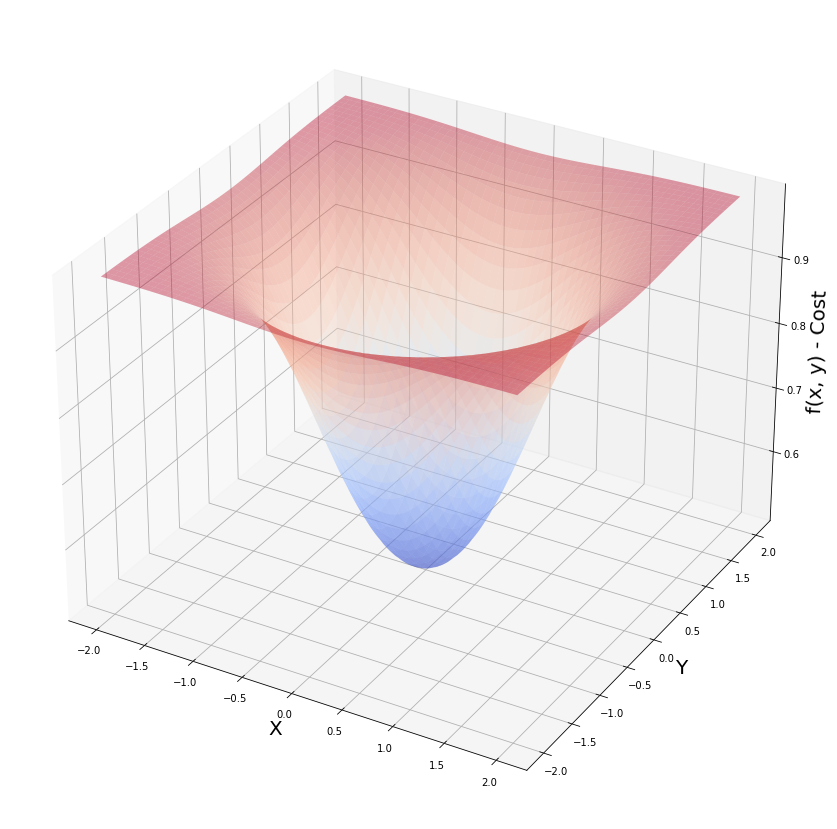

In [4]:
#Generating 3D Plot
fig = plt.figure(figsize=[20, 15])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x, y, f(x, y), cmap=cm.coolwarm, alpha=0.4)
plt.show()

## Partial Derivatives and Symbolic Computation

In [5]:
a, b = symbols('x, y')
print('Our Cost function f(x, y) is:', f(a, b))
print('Our derivative with respect to x is:', diff(f(a, b), a))
print('Value f(x, y) at x=1.8 y=1.0 is:', f(a, b).evalf(subs={a:1.8, b:1.0})) # Using Python Dictionary
print('Value of Partial Derivativr wrt x:', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our Cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Our derivative with respect to x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value f(x, y) at x=1.8 y=1.0 is: 0.990604794032582
Value of Partial Derivativr wrt x: 0.0368089716197505


## Batch Gradient Descent with SymPy

## $\frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2 - y^2}}{ \left(3^{-x^2 - y^2} + 1 \right)^2}$
## $\frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2 - y^2}}{ \left(3^{-x^2 - y^2} + 1 \right)^2}$

In [6]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


In [7]:
# Partial derivative functions example
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [8]:
# Setup without SymPy
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5
